In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import seaborn as sns 

foldername='Results'
if os.path.exists(foldername):
    pass
else:
    os.makedirs(foldername)
X=np.array([[1,2,3],[4,5,6],[7,8,9]])
x=np.array([1,2,3,3,3,4,5,6,7,8,9,2,3,4,5,6])


In [45]:
# Define paramters and monte carlo simulaotr with pricing fucntion fpr asian options 

s0=100
k=np.linspace(80,120,5)
r=0.05
sigma=0.3
t=np.linspace(1,2,5)
nofsteps=100
noofpaths=10000
Data = pd.DataFrame(columns = range(len(t)), index = range(len(k)))
Data.index.name='Strikes'
Data.columns.name='Maturities'

def monte_carlo_asian(s0,k,r,sigma,t,nofsteps,noofpaths,type):
    Results={}
    price = 0
    european=0
    payoff = 0
    european_payoff = 0
    type=type.lower()
    dt=t/nofsteps
    stock=np.zeros((noofpaths,nofsteps+1))
    stock[:,0]=s0
    z=np.random.normal(0,1,(noofpaths,nofsteps))
    time=np.zeros(nofsteps+1)
    for i in range(nofsteps):
        z[:,i]=(z[:,i]-np.mean(z[:,i]))/np.std(z[:,i],ddof=1)
        stock[:,i+1]=stock[:,i] + stock[:,i]*r*dt + stock[:,i]*sigma*z[:,i]*np.sqrt(dt)  
        time[i+1]=time[i]+dt
    Results['stock']=stock
    Results['time']=time
    Results['terminal']=stock[:,-1]
    Results['average']=np.mean(stock,axis=1)
    
    if type=='call':
        price = np.exp(-r*t)*np.mean(np.maximum(Results['average']-k,0))
        european=np.exp(-r*t)*np.mean(np.maximum(Results['terminal']-k,0))
        payoff = np.exp(-r*t)*np.maximum(Results['average']-k,0)
        european_payoff = np.exp(-r*t)*np.maximum(Results['terminal']-k , 0)
    if type=='put':
        price = np.exp(-r*t)*np.mean(np.maximum(k-Results['average'],0))
        european=np.exp(-r*t)*np.mean(np.maximum(k-Results['terminal'],0))
        payoff = np.exp(-r*t)*np.maximum(k-Results['average'],0)
        european_payoff = np.exp(-r*t)*np.maximum(k-Results['terminal'] , 0)
    Results['price']=price
    Results['payoff']=payoff
    Results['european']=european
    Results['eurpena_payoff']=european_payoff
    return Results



In [28]:
# Generatig the data for the given set fo strikes and maturities and getting call prices
for i in range(len(k)):
    for j in range(len(t)):
        result=monte_carlo_asian(s0,k[i],r,sigma,t[j],nofsteps,noofpaths,'call')
        Data.iloc[i,j]=result['price']  
Data.to_csv('Results/Asian_call_prices.csv')

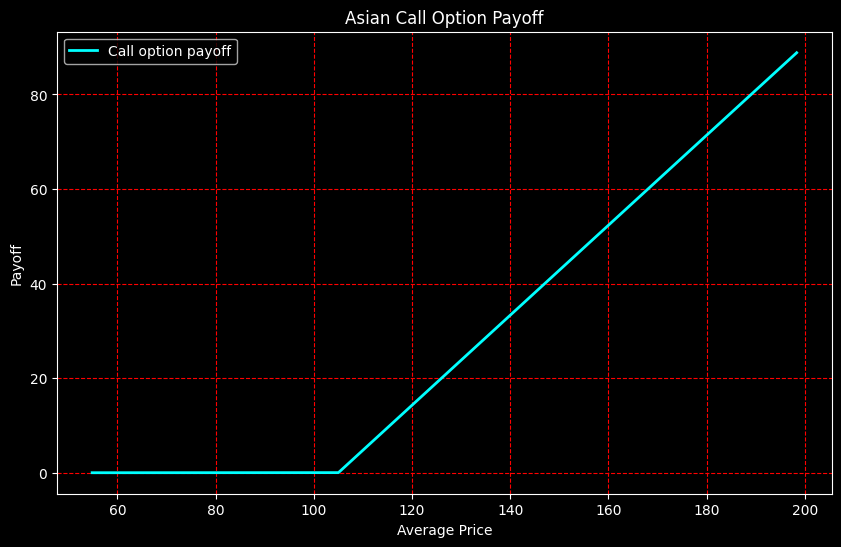

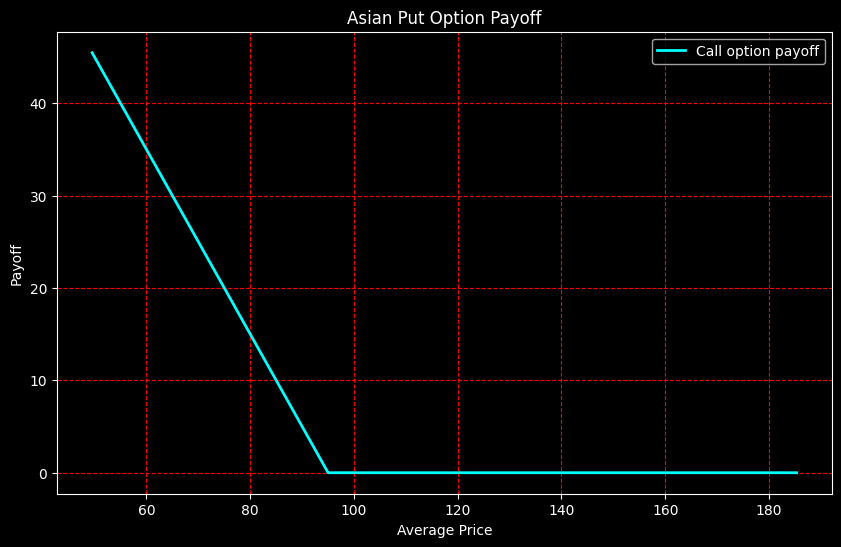

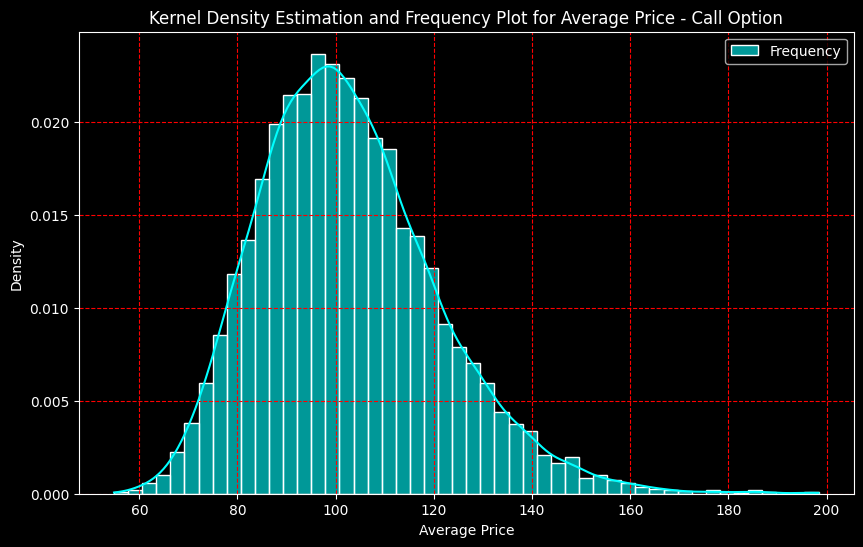

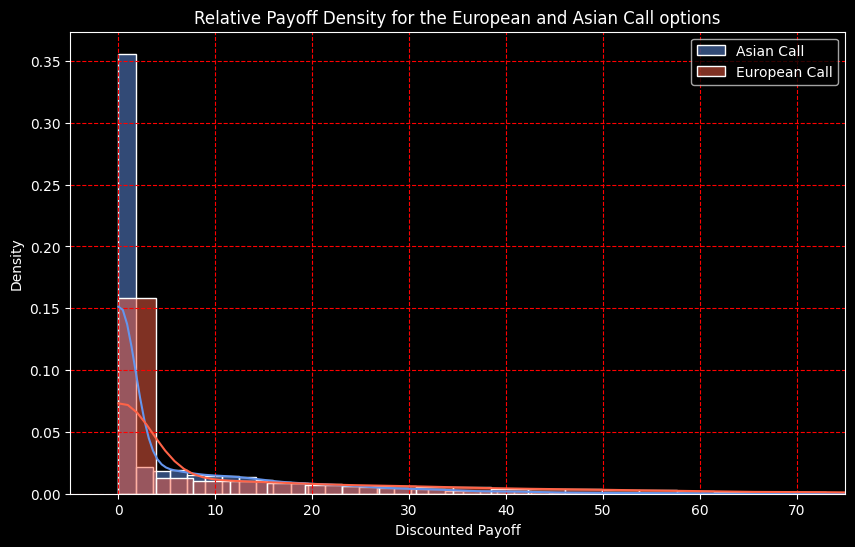

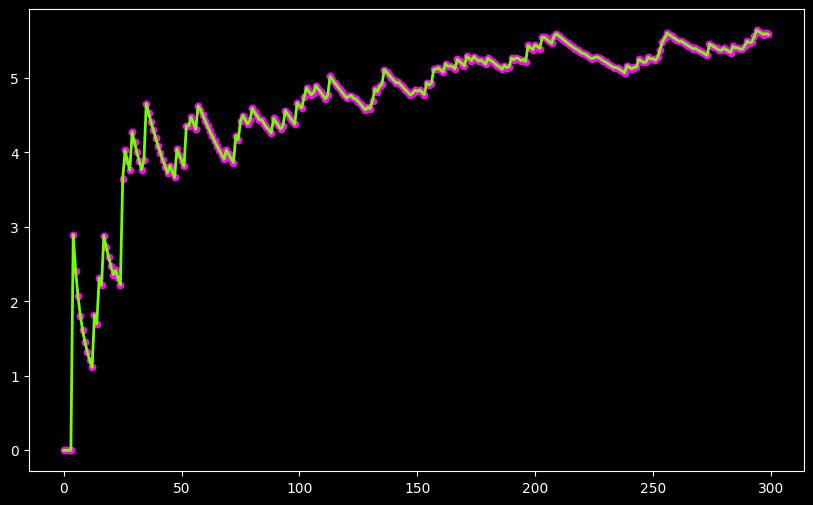

In [ ]:


# plots for the given set of strikes and maturities
call = monte_carlo_asian(s0,105,r,sigma,1,nofsteps,noofpaths,'call')
put = monte_carlo_asian(s0,95,r,sigma,1,nofsteps,noofpaths,'put')

# plotting the payoff for the asian optin for call and puts for the given set of strikes and matrutities 
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
plt.plot(np.unique(call['average']),np.sort(call['payoff']),color='cyan',label='Call option payoff',linewidth=2)
plt.xlabel('Average Price')
plt.ylabel('Payoff')
plt.title('Asian Call Option Payoff')
plt.legend()
plt.grid(color='red',linestyle='--')


plt.style.use('dark_background')
plt.figure(figsize=(10,6))
plt.plot(np.unique(put['average']) , np.maximum(95-np.unique(put['average']),0),color='cyan',label='Call option payoff',linewidth=2)
plt.xlabel('Average Price')
plt.ylabel('Payoff')
plt.title('Asian Put Option Payoff')
plt.legend()
plt.grid(color='red',linestyle='--')

# plotting the kernel density and freaunecy plots for the average price of the stock paths 
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
sns.histplot(call['average'],bins=50,color='cyan',alpha=0.6,label='Frequency',kde=True,stat='density')
plt.xlabel('Average Price')
plt.ylabel('Density')
plt.title('Kernel Density Estimation and Frequency Plot for Average Price - Call Option')
plt.legend()
plt.grid(color='red',linestyle='--')

# plotting the payoff dsitrubution of european vs asian options 
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
sns.histplot(call['payoff'],bins=50,color='cornflowerblue',kde=True,label='Asian Call',stat='density')
sns.histplot(call['eurpena_payoff'],bins=50,color='tomato',kde=True,label='European Call',stat='density')
plt.xlim(-5,75)
plt.xlabel('Discounted Payoff')
plt.ylabel('Density')
plt.title('Relative Payoff Density for the European and Asian Call options')
plt.legend()
plt.grid(color='red',linestyle='--')

# plotting the convergenece plots for the monte carlo simulation and the price of the asian call \
runs=300
call_1 = monte_carlo_asian(s0,105,r,sigma,1,nofsteps,runs,'call')    
running_mean = np.cumsum(call_1['payoff'])/(np.arange(1,runs+1))
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
plt.plot(running_mean,color="#73FF00",linewidth=2,label='Asian Call Price')
plt.scatter(range(runs),running_mean,color=
            "#FF00FB",s=21,label='Data_Points')
plt.xlabel('Number of simulations',fontdict={})